In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as st
from scipy.stats import linregress

In [8]:
poverty_rate_df = pd.read_csv("Resources/combined_poverty_rate_revised.csv")
school_grade_15_df = pd.read_csv("Resources/schoolgrade2015_revised.csv")
school_grade_16_df = pd.read_csv("Resources/schoolgrade2016_revised.csv")
school_grade_17_df = pd.read_csv("Resources/schoolgrade2017_revised.csv")
school_grade_18_df = pd.read_csv("Resources/schoolgrade2018_revised.csv")
school_grade_19_df = pd.read_csv("Resources/schoolgrade2019_revised.csv")
school_grade_15_df.head()

,Corp ID,Corporate Name,Corp Grade 2015
0,15,Adams Central Community Schools,C
1,5265,Alexandria Community School Corporation,C
2,5275,Anderson Community School Corporation,D
3,5470,Argos Community Schools,B
4,2435,Attica Consolidated School Corporation,D


The correlation coefficient between poverty rate and district grade is 0.55


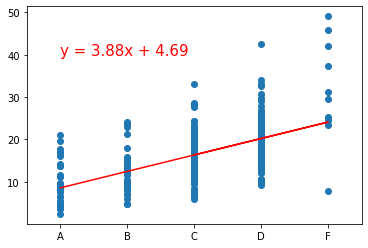

In [47]:
grade_list_15 = school_grade_15_df['Corp Grade 2015']
num_list_15 = []
letter_grade = ['','A','B','C','D','F']
for grade in grade_list_15:
    if grade == 'A':
        num_list_15.append(1)
    elif grade == 'B':
        num_list_15.append(2)
    elif grade == 'C':
        num_list_15.append(3)
    elif grade == 'D':
        num_list_15.append(4)
    elif grade == 'F':
        num_list_15.append(5)
        
school_grade_15_df['Number'] = num_list_15
unique = np.unique(letter_grade, return_inverse=True)
grade_15 = school_grade_15_df['Number']
pov_15 = poverty_rate_df['2015 Poverty Rate']

# line regression for 2015 pov rate and grad rate.
(slope, intercept, rvalue, pvalue, stderr) = linregress(grade_15,pov_15)
regress_values = grade_15 * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(grade_15,pov_15)
plt.plot(grade_15,regress_values,"r-")
plt.annotate(line_eq,(1,40),fontsize=15,color="red")
plt.xticks(range(len(letter_grade)), letter_grade)
plt.xlim(.5, 5.5)

plt.show

print(f"The correlation coefficient between poverty rate and district grade is {round(st.pearsonr(grade_15,pov_15)[0],2)}")